In [173]:
#import pandas
import pandas as pd
# import matplotlib
import matplotlib.pyplot as plt
#import seaborn
import seaborn as sns
#import numpy
import numpy as np

#import Car Ads Dataset
car_dataset_url ='https://raw.githubusercontent.com/ankitind/sample_datasets/master/car_ad.csv'
car_ads = pd.read_csv(car_dataset_url, header=0)


Content

**Dataset contains 9576 rows and 10 variables with essential meanings:**

- car: manufacturer brand
- price: seller’s price in advertisement (in USD)
- body: car body type
- mileage: as mentioned in advertisement (‘000 Km)
- engV: rounded engine volume (‘000 cubic cm)
- engType: type of fuel (“Other” in this case should be treated as NA)
- registration: whether car registered in Ukraine or not
- year: year of production
- model: specific model name
- drive: drive type

In [174]:
print("Columns")
print("--------")
print(car_ads.columns)
print()

print("Data Type")
print("--------")
print(car_ads.dtypes)



Columns
--------
Index(['car', 'price', 'body', 'mileage', 'engV', 'engType', 'registration',
       'year', 'model', 'drive'],
      dtype='object')

Data Type
--------
car              object
price           float64
body             object
mileage           int64
engV            float64
engType          object
registration     object
year              int64
model            object
drive            object
dtype: object


##### Print all unique values with their counts of columns which are objects 

In [175]:
for col in car_ads.columns:
    if car_ads[col].dtype == object: 
        print("")
        print("---- %s ---" % col)
        print(car_ads[col].value_counts().head(7))
 



---- car ---
Volkswagen       936
Mercedes-Benz    921
BMW              694
Toyota           541
VAZ              489
Renault          469
Audi             457
Name: car, dtype: int64

---- body ---
sedan        3646
crossover    2069
hatch        1252
van          1049
other         838
vagon         722
Name: body, dtype: int64

---- engType ---
Petrol    4379
Diesel    3013
Gas       1722
Other      462
Name: engType, dtype: int64

---- registration ---
yes    9015
no      561
Name: registration, dtype: int64

---- model ---
E-Class         199
A6              172
Vito ����.      171
Kangoo ����.    146
Camry           134
Lanos           127
X5              119
Name: model, dtype: int64

---- drive ---
front    5188
full     2500
rear     1377
Name: drive, dtype: int64


##### Describe all columns which are NOT objects

In [176]:
for col in car_ads.columns:
    if car_ads[col].dtype != object: 
        print(car_ads[col].name)

price
mileage
engV
year


In [177]:
for col in car_ads.columns:
    if car_ads[col].dtype != object: 
        print("")
        print("---- %s ---" % col)
        print(car_ads[col].describe())
        print("--After Dropping NaN--")
        print(car_ads.dropna(how='any')[col].describe())
        print(car_ads[col].describe()['mean'])
        
        
 



---- price ---
count      9576.000000
mean      15633.317316
std       24106.523436
min           0.000000
25%        4999.000000
50%        9200.000000
75%       16700.000000
max      547800.000000
Name: price, dtype: float64
--After Dropping NaN--
count      8739.000000
mean      15733.542261
std       24252.904810
min           0.000000
25%        5000.000000
50%        9250.000000
75%       16800.000000
max      547800.000000
Name: price, dtype: float64
15633.317316

---- mileage ---
count    9576.000000
mean      138.862364
std        98.629754
min         0.000000
25%        70.000000
50%       128.000000
75%       194.000000
max       999.000000
Name: mileage, dtype: float64
--After Dropping NaN--
count    8739.000000
mean      140.095434
std        97.892213
min         0.000000
25%        71.000000
50%       130.000000
75%       195.500000
max       999.000000
Name: mileage, dtype: float64
138.862364244

---- engV ---
count    9142.000000
mean        2.646344
std         5.92

//anaconda/lib/python3.5/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


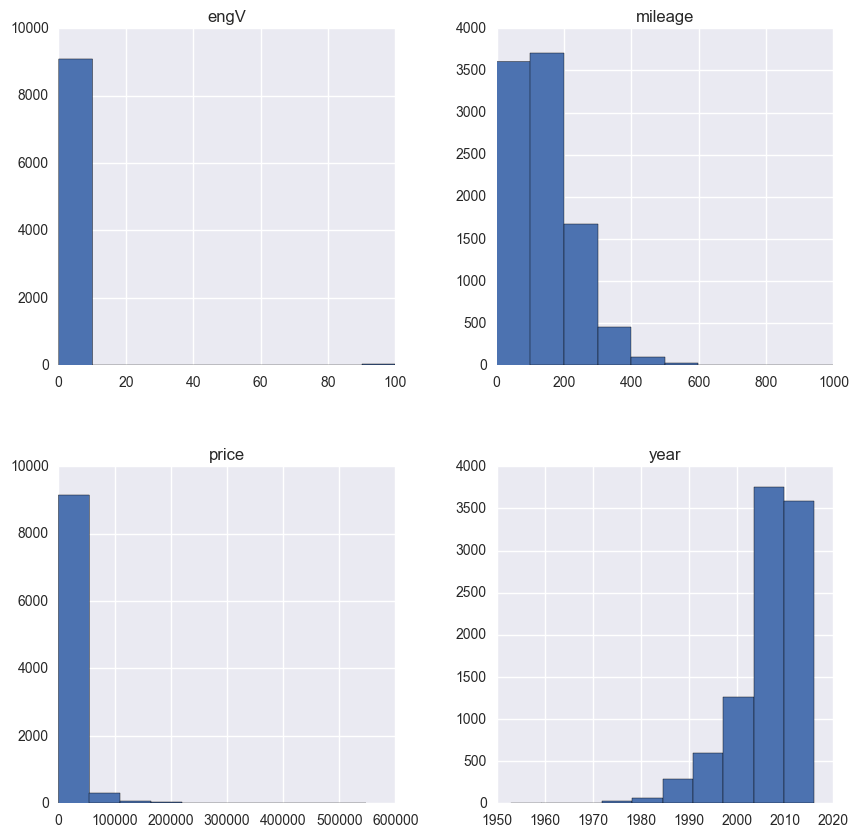

In [184]:
pd.DataFrame.hist(car_ads, figsize = [10,10])
plt.show()

97


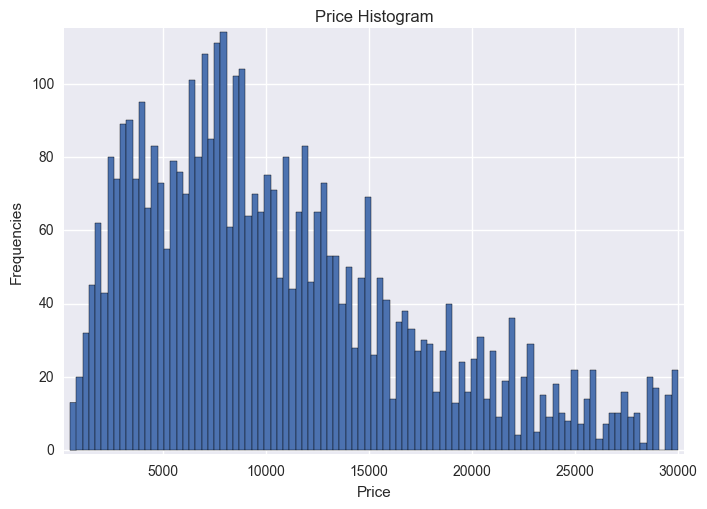

In [48]:
sns.set()

n_bins = int(np.sqrt(len(car_ads['price'])))
print(n_bins)
# Plot histogram of price
_ = plt.hist(car_ads.head(5000).price, bins=n_bins, range=[500,30000])
plt.xlabel('Price')
plt.ylabel('Frequencies')
plt.title('Price Histogram')
plt.margins(0.01)
# Show histogram
plt.show()

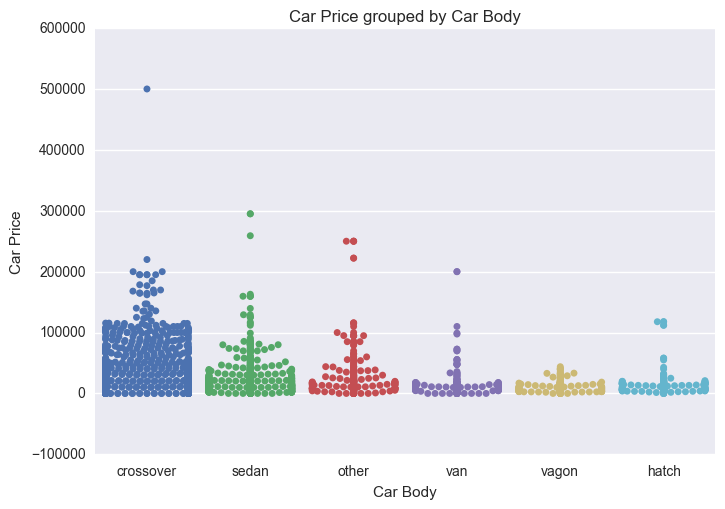

In [11]:
sns.set()

#Plot swarm plot of price
_ = sns.swarmplot(x=car_ads.head(1000).body, y=car_ads.head(1000).price)
_ = plt.xlabel('Car Body')
_ = plt.ylabel('Car Price')
_ = plt.title('Car Price grouped by Car Body')

plt.show()

## ECDF
An ECDF graph is very usefull to have a summary analysis of a big sample of very different values, but the first contact is quite surprising

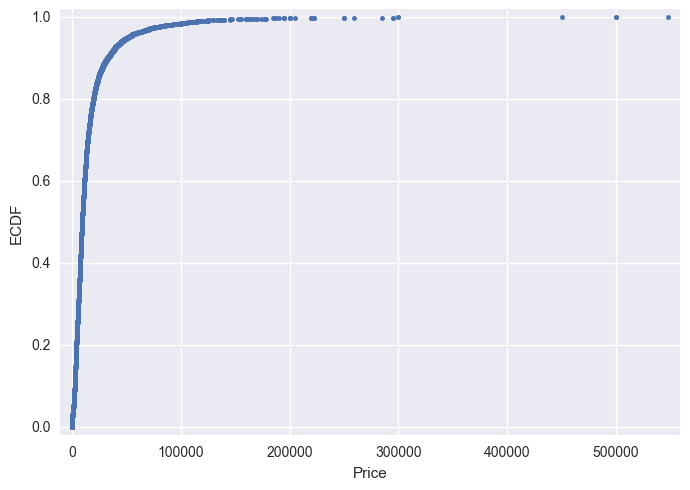

In [62]:
#ser = ser.sort_values()
def ecdf(dataSer):
    x = dataSer.sort_values()
    n = len(x)
    y = np.arange(1, n+1) / n
    return x,y


x_vers, y_vers = ecdf(car_ads.price)
_ = plt.plot(x_vers, y_vers, marker='.', linestyle='none')
# Make the margins nice
plt.margins(0.02)

# Label the axes
_ = plt.xlabel('Price')
_ = plt.ylabel('ECDF')

# Display the plot
plt.show()



- almost all cars have more than 5000 and less than 100,000 price
- 80% of the cars are expensive than 2000

### Comparisons of ECDFs

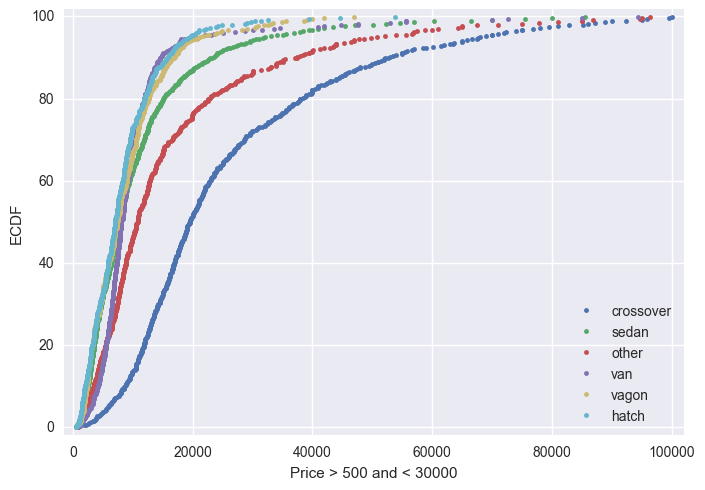

In [119]:
#print(car_ads.price[car_ads.body == 'crossover'])
#ser = ser.sort_values()
def ecdf(dataSer):
    x = dataSer.sort_values()
    n = len(x)
    y = np.arange(1, n+1) / n
    return x,y

def percentile_calc(dataSer, percentiles):
    ptiles_vers = np.percentile(dataSer, percentiles)
    return ptiles_vers
    
    

# Get all unique values of car Bodies
BodyArr = car_ads.body.unique()
for body in BodyArr:
    #print(body)
    subset_cars = car_ads.price[(car_ads.price > 500) & (car_ads.price < 100000)]
    ## We are taking a subset of the cars price since we 
    ## found most of the cars lied in that range
    percentiles = np.arange(0, 100, .2)
    ptiles_vers = percentile_calc(subset_cars[car_ads.body == body], percentiles)
    y_vers = percentiles
    x_vers = ptiles_vers

    
    #x_vers, y_vers = ecdf(subset_cars[car_ads.body == body])
    _ = plt.plot(x_vers, y_vers, marker='.', linestyle='none')
    # Make the margins nice
    plt.margins(0.02)

    # Label the axes
    _ = plt.legend(BodyArr, loc='lower right')
    _ = plt.xlabel('Price > 500 and < 30000')
    _ = plt.ylabel('ECDF')

    # Display the plot
plt.show()





We can clearly see crossover are more expensive

### Boxplots

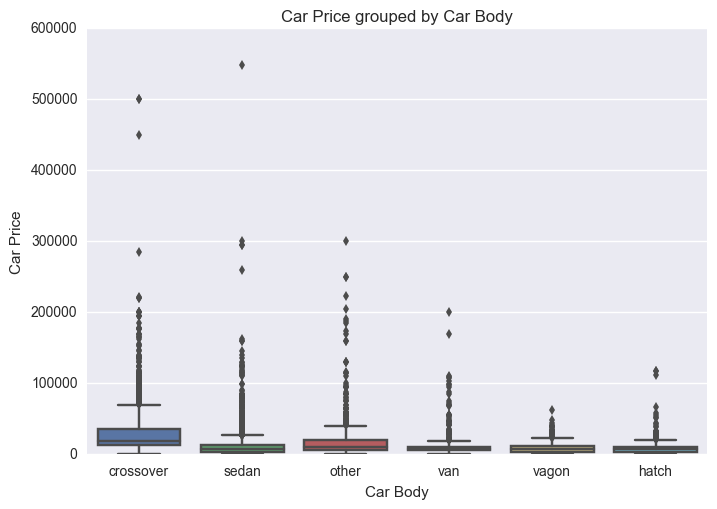

In [89]:
_ = sns.boxplot(x=car_ads.body, y=car_ads.price )
_ = plt.xlabel('Car Body')
_ = plt.ylabel('Car Price')
_ = plt.title('Car Price grouped by Car Body')

plt.show()

Since the Uppper percentiles of all box plots is less than 60,000. Let's
set th eupper limt of car price at 60,000 for thee box plot. 

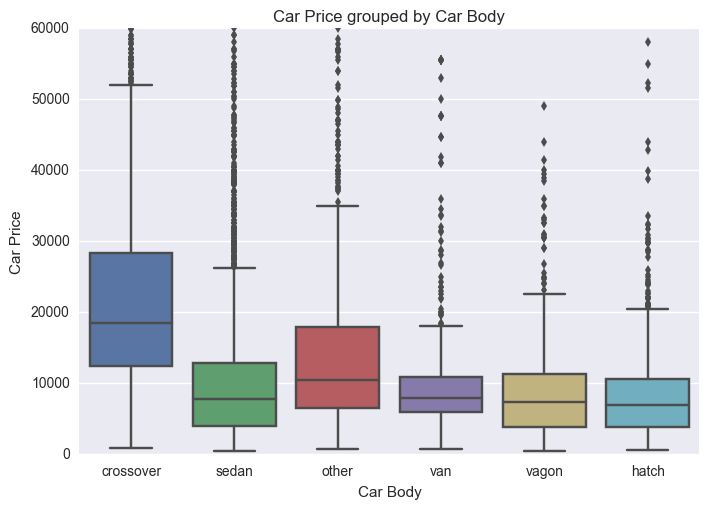

In [103]:
_ = sns.boxplot(x=car_ads.body, y=car_ads.price[(car_ads.price < 60000) & (car_ads.price > 500)] )
_ = plt.xlabel('Car Body')
_ = plt.ylabel('Car Price')
_ = plt.title('Car Price grouped by Car Body')

plt.show()

## Scatterplot
Corelation between two qunatitative variables

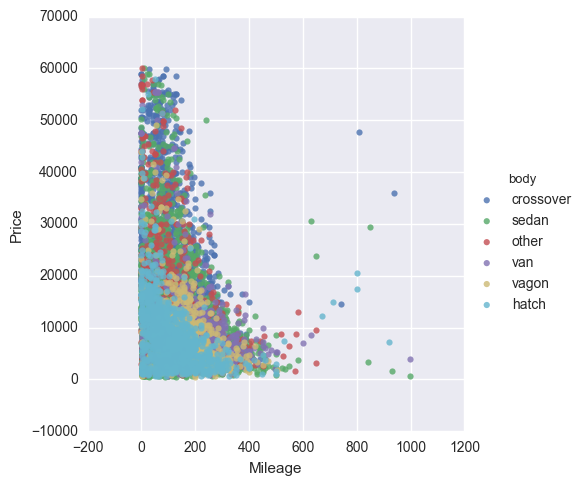

In [151]:
car_subset = car_ads[(car_ads.price>500) & (car_ads.price<60000)]
_ = sns.lmplot('mileage', 'price', data=car_subset, hue='body', fit_reg=False)
_ = plt.xlabel('Mileage')
_ = plt.ylabel('Price')
#_ = plt.legend(BodyArr, loc='lower right')
plt.show()

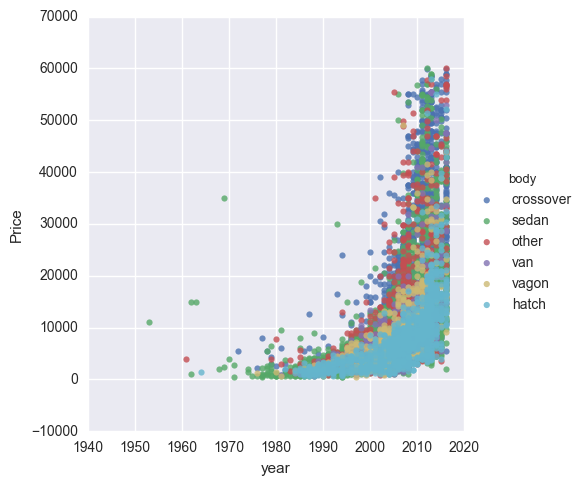

In [158]:
car_subset = car_ads[(car_ads.price>500) & (car_ads.price<60000)]
_ = sns.lmplot('year', 'price', data=car_subset, hue='body', fit_reg=False)
_ = plt.xlabel('year')
_ = plt.ylabel('Price')
#_ = plt.legend(BodyArr, loc='lower right')
plt.show()

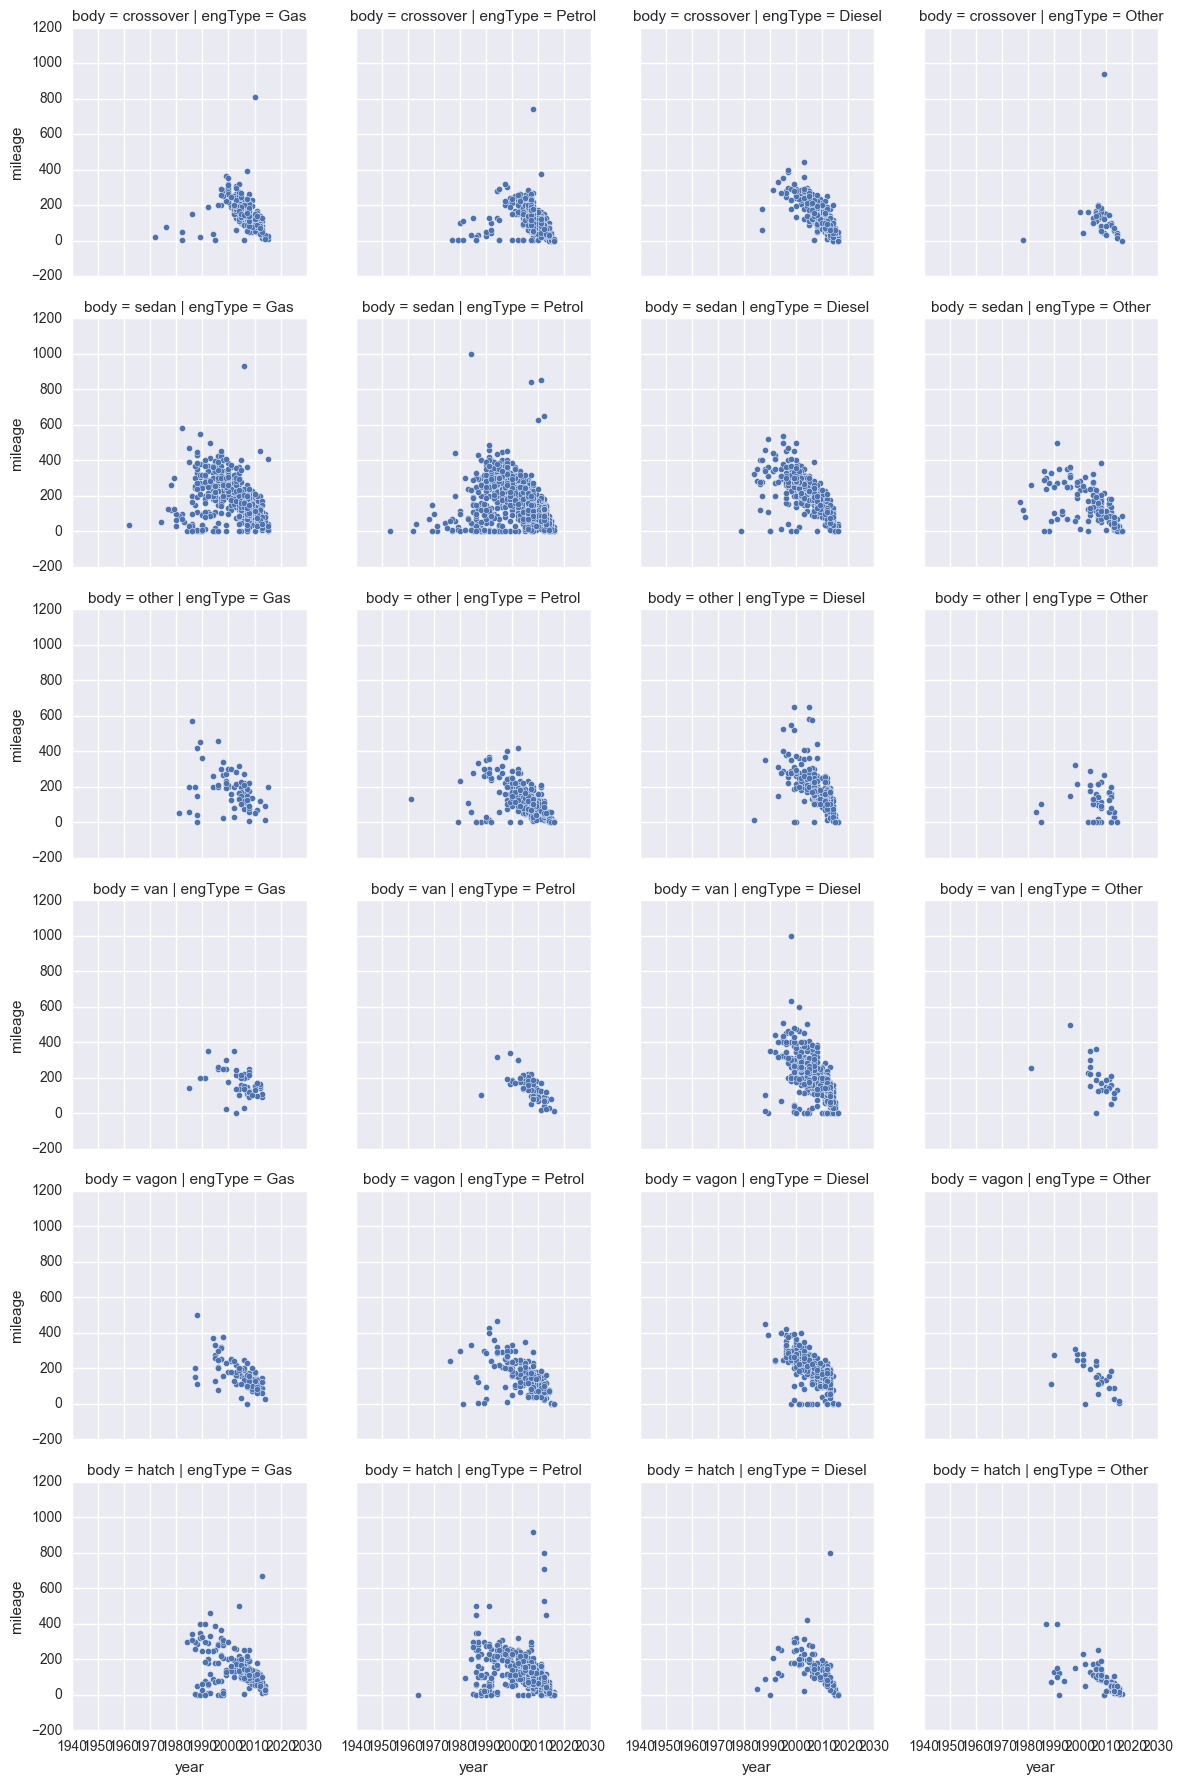

In [172]:
car_subset = car_ads[(car_ads.price>500) & (car_ads.price<60000)]
#_ = sns.lmplot('year', 'price', data=car_subset, hue='body', fit_reg=False)
#_ = plt.xlabel('year')
#_ = plt.ylabel('Price')
#_ = plt.legend(BodyArr, loc='lower right')

#g = sns.FacetGrid(car_subset, col="body",  row="engType")
g = sns.FacetGrid(car_subset, col="engType", row='body')
g = g.map(plt.scatter, "year", "mileage", edgecolor="w")
plt.show()